## We will be implementing Multi Variate Linear Regression model from scratch along with Mean squared error (MSE) as well as Gradient Descent from scratch then we will comapre it with an example to Sklearn linear regression model. All from scratch.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1 is intializing the parameters which are w and b thses parameters will be used in the prediction calculation.
# lenX is the number of features in the data set

def intialize_param (lenX):
    w = np.zeros((1,lenX))
    b = 0 
    return w,b


In [3]:
# Step 2 get the prdection vector z which is z= w(X) + b
# where w is weight vector, X is the Data matrix and b is bias
# Also knwon as forward propogation

def forward_prop (X,w,b):
    # w --> 1xn and X --> nxm so z --> 1xm
    # add b as scaler
    z = np.dot(w,X) + b
    return z

In [5]:
# Step 3 Calculate the cost function MSE
# prdections are z
# target is y
def mean_squared_error(z, y):
    m = y.shape[1]
    J= (1/(2*m)) * np.sum(np.square(z-y))
    return J

In [6]:
# Step 4 here we get the back propogation to get the change in parameters
# Half of the gradient descent
def back_prop(X,y,z):
    
    # find the derivative of cost function with respect to the weight param which is dw
    # dw = the dot product btw dz and the transpose of X 
    # so get dz = dJ/dz* --> 1xm
    # * is feature 1,2,....n
    #  where for example dJ/dw1 = summation of dJ/dz1 times (X1)1+ dJ/dz2 times (X1)2 + .... + dJ/dzn times (X1)n
    # [dJ/dz1 , dJ/dz2, ..., dJ/dzn] . [(x1)1 , (x2)1, ...., (xn)1,
    #                                   (x1)2 , (x2)2, ...., (xn)2]
    # that is X transpose --> mxn
    
    
    m = y.shape[1]
    dz = (1/m) * (z-y)
    dw = np.dot(dz,X.T) # dw --> 1xn 
    db = np.sum(dz)
    return dw,db

In [9]:
# Step 5 Update the param to get full Gradient Descent
def gradient_Decent_update (w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w,b 

# they are the best parametrs

In [64]:
# Step 6 The Multivariate Linear Regreassion Model
def multi_variate_linearReg_model (X_train, y_train, X_valid,y_valid,learning_rate, epochs):
    
    lenw = X_train.shape[0] # .shape[0] gives the number of rows
    w,b = intialize_param(lenw) # step 1
    
    costs_train = []
    m_train = y_train.shape[1]
    m_val =y_valid.shape[1]
    
    for i in range(1,epochs+1):
        
        # get the prediction vector 
        z_train = forward_prop(X_train, w, b) # step 2
        
        error_train = mean_squared_error(z_train, y_train) # step 3
        
        dw,db = back_prop(X_train, y_train, z_train) # step 4 
        
        # get the best parameters
        w,b = gradient_Decent_update (w, b, dw, db, learning_rate) # step 5
        
        # store cost ( error ) for plotting
        if i % 10 == 0 :
            costs_train.append(error_train)
        
        # MAE train for evaluating
        MAE_train = (1/m_train)*np.sum(np.abs(z_train - y_train))
        
        # cost_val, MAE_val
        z_val = forward_prop(X_valid,w,b)
        cost_val = mean_squared_error(z_val, y_valid)
        MAE_val = (1/m_val)*np.sum(np.abs(z_val - y_valid))
        
        # Print all 
        print("Epochs "+ str(i)+ "/" + str(epochs)+": ")
        print("Traing cost (error) "+str(error_train)+"|"+ " Validaton cost"+str(cost_val))
        print("Traing MAE "+str(MAE_train)+"|"+" Validaton MAE"+str(MAE_val))
    

    # Plotting
    plt.plot(costs_train)
    plt.xlabel("Iteration (per tens)")
    plt.ylabel("Training cost")
    plt.title("Learning Rate" +str(learning_rate))
    plt.show()

## Now illustrate the above ideas and theory with an example
### We want to predict houce pricing in boston based on some features.

In [15]:
import pandas as pd
import sklearn

In [16]:
from sklearn.datasets import load_boston

In [17]:
boston = load_boston()

### Data preprocessing

In [19]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [20]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [23]:
# we notice it has 506 rows and 13 feature
boston["data"].shape

(506, 13)

In [26]:
bost = pd.DataFrame(boston["data"],columns =boston['feature_names'])

In [27]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [32]:
# Normalize the input X matrix so that the data is in range -1 and 1
X = (bost - bost.mean()) / (bost.max() - bost.min())

In [33]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-7.021173e-18,7.898820e-18,-7.828608e-16,-1.579764e-17,6.389268e-16,-1.544219e-15,-3.405269e-16,1.404235e-16,0.000000,2.808469e-17,-2.341561e-15,1.976460e-15,-1.088282e-16
std,9.667929e-02,2.332245e-01,2.514792e-01,2.539940e-01,2.384314e-01,1.346268e-01,2.898956e-01,1.914822e-01,0.378576,3.216357e-01,2.303134e-01,2.302054e-01,1.970492e-01
min,-4.054410e-02,-1.136364e-01,-3.913775e-01,-6.916996e-02,-3.491668e-01,-5.218690e-01,-6.763636e-01,-2.423813e-01,-0.371713,-4.222083e-01,-6.229291e-01,-8.985678e-01,-3.014090e-01
25%,-3.969297e-02,-1.136364e-01,-2.179904e-01,-6.916996e-02,-2.174795e-01,-7.647718e-02,-2.425325e-01,-1.541223e-01,-0.241279,-2.466358e-01,-1.122908e-01,4.716191e-02,-1.573693e-01
50%,-3.773202e-02,-1.136364e-01,-5.303441e-02,-6.916996e-02,-3.435197e-02,-1.458793e-02,9.191657e-02,-5.343258e-02,-0.197800,-1.493075e-01,6.324111e-02,8.766445e-02,-3.568055e-02
75%,7.143872e-04,1.136364e-02,2.552500e-01,-6.916996e-02,1.426028e-01,6.492922e-02,2.626169e-01,1.267068e-01,0.628287,4.919138e-01,1.855815e-01,9.973011e-02,1.187069e-01
max,9.594559e-01,8.863636e-01,6.086225e-01,9.308300e-01,6.508332e-01,4.781310e-01,3.236364e-01,7.576187e-01,0.628287,5.777917e-01,3.770709e-01,1.014322e-01,6.985910e-01


In [34]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [37]:
# setting the target y column
y = boston["target"]

In [40]:
y.shape # its 1D

(506,)

### The model

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=5)

In [45]:
X_train.shape

(339, 13)

In [47]:
# Transpose it so that we have # of feature x # of (training examples)
X_train = X_train.T

In [50]:
X_train.shape

(13, 339)

In [48]:
y_train.shape

(339,)

In [49]:
# We need y dimensions to be 1 x m where m is the number of examples
y_train = np.array([y_train])

In [51]:
y_train.shape

(1, 339)

In [52]:
## Same thing for validation test
X_val = X_val.T

In [53]:
X_val.shape

(13, 167)

In [54]:
y_val = np.array([y_val])

In [55]:
y_val.shape

(1, 167)

Epochs 1/500: 
Traing cost (error) 293.87502949852507| Validaton cost134.03952819592888
Traing MAE 22.53716814159292| Validaton MAE13.558080443847112
Epochs 2/500: 
Traing cost (error) 126.29007943286858| Validaton cost72.53024841900947
Traing MAE 13.556920515044165| Validaton MAE8.567173211994337
Epochs 3/500: 
Traing cost (error) 64.48605249549566| Validaton cost49.185779370784566
Traing MAE 8.584464564354887| Validaton MAE6.31150796331822
Epochs 4/500: 
Traing cost (error) 41.11837291662819| Validaton cost39.862788313569226
Traing MAE 6.132581495701579| Validaton MAE5.546871762049199
Epochs 5/500: 
Traing cost (error) 31.8464749408043| Validaton cost35.793142957204076
Traing MAE 5.146516386528717| Validaton MAE5.286502193398581
Epochs 6/500: 
Traing cost (error) 27.83511268481864| Validaton cost33.76085227950457
Traing MAE 4.895580497212939| Validaton MAE5.277031480869301
Epochs 7/500: 
Traing cost (error) 25.850905902447806| Validaton cost32.564577727950024
Traing MAE 4.83455049291

Epochs 217/500: 
Traing cost (error) 10.308933989305592| Validaton cost14.665240670124657
Traing MAE 3.1816994081989787| Validaton MAE3.5023543708247336
Epochs 218/500: 
Traing cost (error) 10.304968445937519| Validaton cost14.65929741327821
Traing MAE 3.1813956199109374| Validaton MAE3.501341458397303
Epochs 219/500: 
Traing cost (error) 10.301053695376304| Validaton cost14.653426870364195
Traing MAE 3.181095122548223| Validaton MAE3.500333531814199
Epochs 220/500: 
Traing cost (error) 10.297188803774914| Validaton cost14.647627824496833
Traing MAE 3.180794244037087| Validaton MAE3.4993305750587527
Epochs 221/500: 
Traing cost (error) 10.293372857337312| Validaton cost14.641899084113074
Traing MAE 3.180493002523482| Validaton MAE3.498332571932156
Epochs 222/500: 
Traing cost (error) 10.28960496185176| Validaton cost14.63623948238509
Traing MAE 3.180191415852747| Validaton MAE3.4973395060599906
Epochs 223/500: 
Traing cost (error) 10.285884242235747| Validaton cost14.630647876647435
Tr

Epochs 428/500: 
Traing cost (error) 9.94802882998765| Validaton cost14.148159314582406
Traing MAE 3.148109409169524| Validaton MAE3.4307563856987167
Epochs 429/500: 
Traing cost (error) 9.94726548218332| Validaton cost14.147330190947141
Traing MAE 3.1480170026295293| Validaton MAE3.430614094639912
Epochs 430/500: 
Traing cost (error) 9.946506034875515| Validaton cost14.146508270363737
Traing MAE 3.1479246362359845| Validaton MAE3.430472465481648
Epochs 431/500: 
Traing cost (error) 9.945750460869862| Validaton cost14.14569350017431
Traing MAE 3.147832312009667| Validaton MAE3.4303314968936998
Epochs 432/500: 
Traing cost (error) 9.944998733267248| Validaton cost14.144885828200891
Traing MAE 3.1477400319394424| Validaton MAE3.4301911875225506
Epochs 433/500: 
Traing cost (error) 9.944250825459228| Validaton cost14.144085202739193
Traing MAE 3.147647797982685| Validaton MAE3.4300515359919537
Epochs 434/500: 
Traing cost (error) 9.943506711123462| Validaton cost14.143291572552506
Traing 

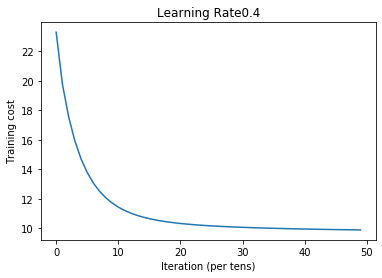

In [65]:
### Implementing the model

multi_variate_linearReg_model(X_train, y_train, X_val, y_val, 0.4, 500)

### Now let us comapre with skLearn model 

In [66]:
from sklearn import linear_model

In [67]:
linearReg = linear_model.LinearRegression()
model = linearReg.fit(X_train.T, y_train.T) # X_train.T because it uses the reverse of our model
predections = linearReg.predict(X_val.T)

In [68]:
predections.shape

(167, 1)

In [70]:
MAE_Val_with_sklearn = (1/y_val.shape[1])*np.sum(np.abs(predections - y_val.T))

In [71]:
MAE_Val_with_sklearn

3.455034932248353

### And Our MAE valdiation got 3.424208205016772 which is less 